In [1]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#load results data
results = pd.read_csv('mystats_hour.csv',parse_dates=True).set_index('date')

In [3]:
#select resutls with 264 period
results = results[(results.period==264)&(results.portfolio>20000)]
results['log_port_val']=np.log(results.portfolio)

In [4]:
pd.to_datetime(results.reset_index().date).dt.to_period('W').dt.to_timestamp().values

array(['2019-12-09T00:00:00.000000000', '2019-12-09T00:00:00.000000000',
       '2019-12-09T00:00:00.000000000', ...,
       '2020-10-19T00:00:00.000000000', '2020-10-19T00:00:00.000000000',
       '2020-10-19T00:00:00.000000000'], dtype='datetime64[ns]')

In [5]:
#get daily and monthly dates from index
results['Daily']=pd.to_datetime(results.reset_index().date).dt.floor(freq='D').values
results['Week']=pd.to_datetime(results.reset_index().date).dt.to_period('W').dt.to_timestamp().values
results['Month']=pd.to_datetime(results.reset_index().date).dt.to_period('M').dt.to_timestamp().values

In [6]:
#calcualte log returns
results['returns']=results\
.log_port_val\
.diff()\
.fillna(0)

In [7]:
# assuming no risk free rate of return
print('Annual Sharpe Ratio: ',np.round(results['returns']\
                                       .mean()/results['returns'].std()*np.sqrt(24*365),2))
print('Annual Return: {}%'.format(np.round((np.exp(results['returns']\
                                       .mean()*24*365)-1)*100,2)))
print('Annual Volatility: {}%'.format(np.round(results['returns']\
                                       .std()*np.sqrt(24*365)*100,2)))
print('Portfolio Return from 2019-12-09 to 2020-10-19: {}%'\
      .format(np.round((np.exp(results['returns'].mean()*7555)-1)*100,2)))
print('Monthly Return: {}%'.format(np.round((np.exp(results['returns'].mean()*24*30)-1)*100,2)))
print('Monthly Volatility: {}%'.format(np.round(results['returns']\
                                       .std()*np.sqrt(24*30)*100,2)))
print('Weekly Return: {}%'.format(np.round((np.exp(results['returns'].mean()*24*7)-1)*100,2)))
print('Weekly Volatility: {}%'.format(np.round(results['returns']\
                                       .std()*np.sqrt(24*7)*100,2)))
print('Starting Cash: $100,000')
print('Final Cash: $184,478.05')

Annual Sharpe Ratio:  2.98
Annual Return: 103.41%
Annual Volatility: 23.8%
Portfolio Return from 2019-12-09 to 2020-10-19: 84.48%
Monthly Return: 6.01%
Monthly Volatility: 6.82%
Weekly Return: 1.37%
Weekly Volatility: 3.3%
Starting Cash: $100,000
Final Cash: $184,478.05


In [8]:
results['previous_status'] = results.status.shift(1).fillna(0)
def get_signal(row):
    if row.status - row.previous_status==0:
        return 'None'
    if row.status == 0:
        return 'Exit'
    elif row.status == 1:
        return 'Short'
    else:
        return 'Long'
results['signal']=results.apply(get_signal,axis=1)

In [9]:
results['signal'].value_counts()

None     7179
Exit      182
Short     115
Long       79
Name: signal, dtype: int64

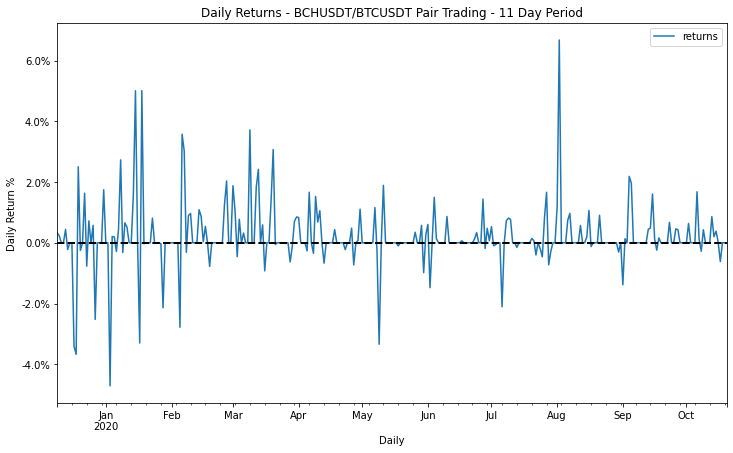

In [10]:
# daily returns
import matplotlib.ticker as mtick
from functools import reduce
returns = lambda x: 0 if pd.isnull(np.exp(x.mean()*x.count())-1) else np.exp(x.mean()*x.count())-1
volatility = lambda x: 0 if pd.isnull(x.std()*np.sqrt(x.count())) else x.std()*np.sqrt(x.count())

ax = (results\
.groupby('Daily')\
.agg({'returns': returns})*100)\
.plot(figsize=(12,7),
     title='Daily Returns - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Daily Return %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.axhline(y=0 * 5, xmin=0, xmax=1, color='black', linestyle='--', lw=2)

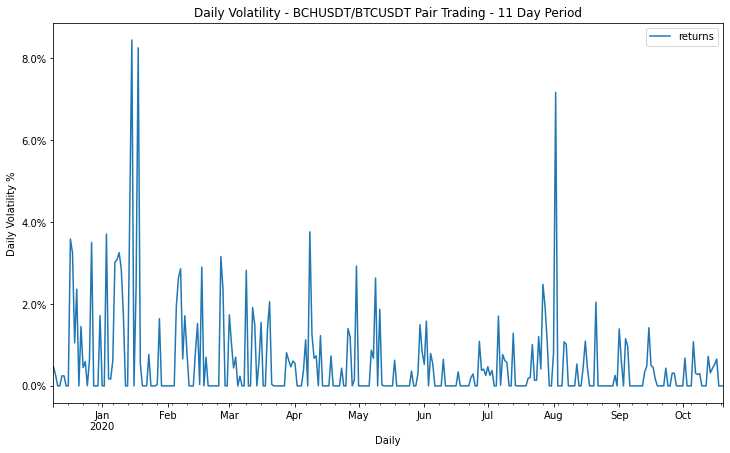

In [11]:
#daily volatility
ax = (results\
.groupby('Daily')\
.agg({'returns': volatility})*100)\
.plot(figsize=(12,7),
     title='Daily Volatility - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Daily Volatility %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

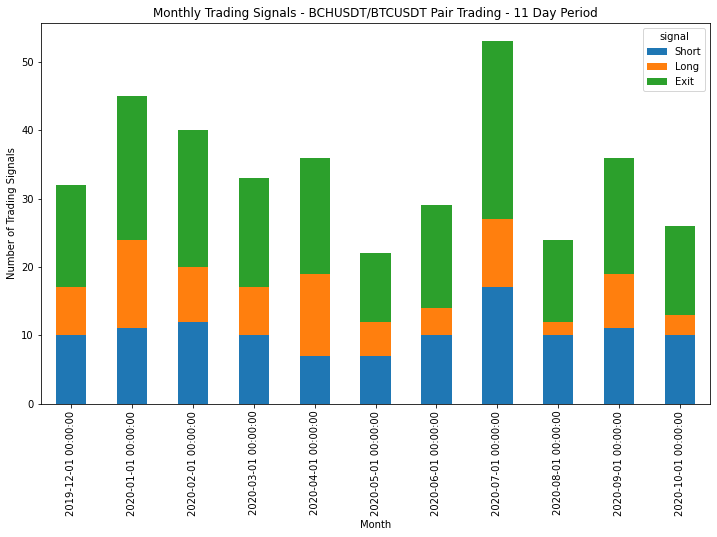

In [12]:
#monthly trading signals
df2 = results.groupby(['Month', 'signal'])['portfolio'].count().unstack('signal').fillna(0)
df2[['Short','Long','Exit']].plot(kind='bar', stacked=True,figsize=(12,7),
                                 ylabel='Number of Trading Signals',
                                 title='Monthly Trading Signals - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period')

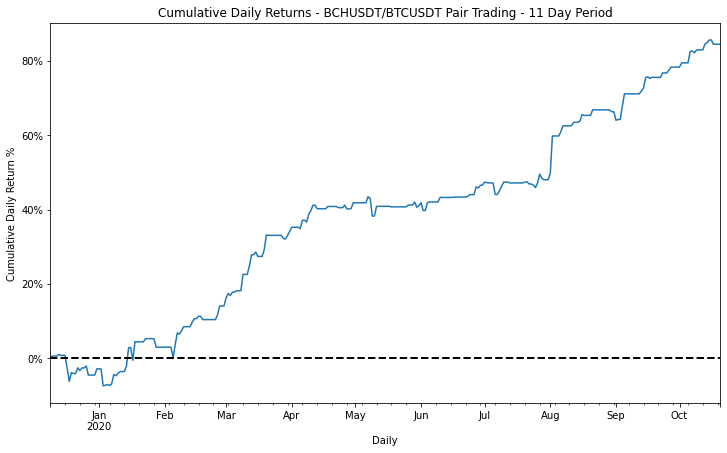

In [13]:
# cumulative daily returns
ax = ((np.exp(results\
.groupby('Daily')['returns']\
.sum().cumsum())-1)*100)\
.plot(figsize=(12,7),
     title='Cumulative Daily Returns - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Cumulative Daily Return %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.axhline(y=0 * 5, xmin=0, xmax=1, color='black', linestyle='--', lw=2)

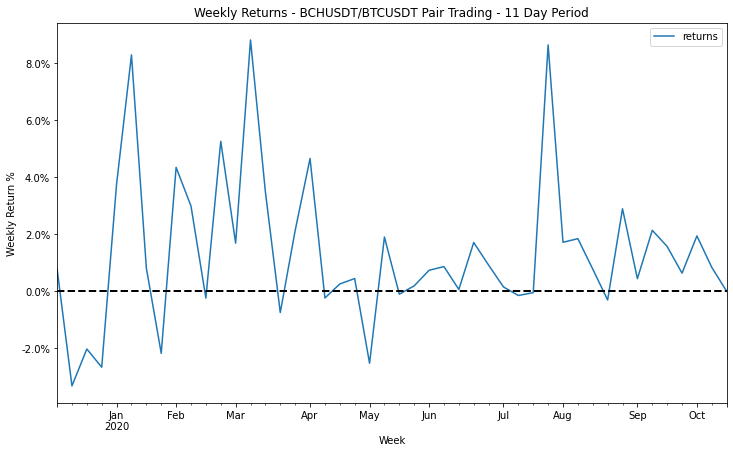

In [14]:
# weekly returns
import matplotlib.ticker as mtick
from functools import reduce
returns = lambda x: 0 if pd.isnull(np.exp(x.mean()*x.count())-1) else np.exp(x.mean()*x.count())-1
volatility = lambda x: 0 if pd.isnull(x.std()*np.sqrt(x.count())) else x.std()*np.sqrt(x.count())

ax = (results\
.groupby('Week')\
.agg({'returns': returns})*100)\
.plot(figsize=(12,7),
     title='Weekly Returns - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Weekly Return %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.axhline(y=0 * 5, xmin=0, xmax=1, color='black', linestyle='--', lw=2)

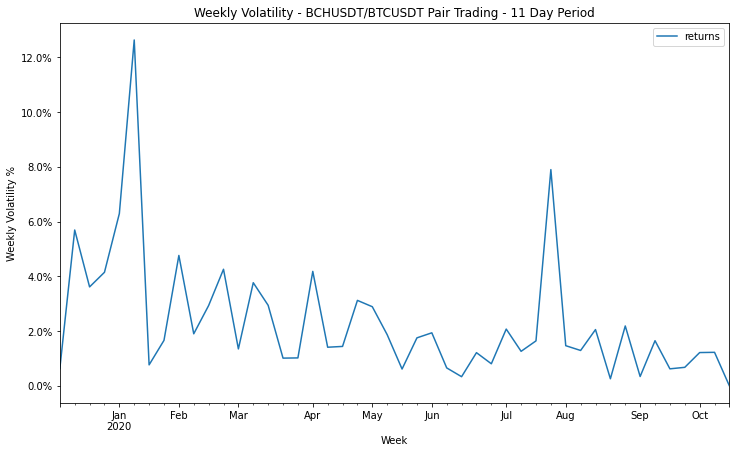

In [15]:
#weekly volatility
ax = (results\
.groupby('Week')\
.agg({'returns': volatility})*100)\
.plot(figsize=(12,7),
     title='Weekly Volatility - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Weekly Volatility %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

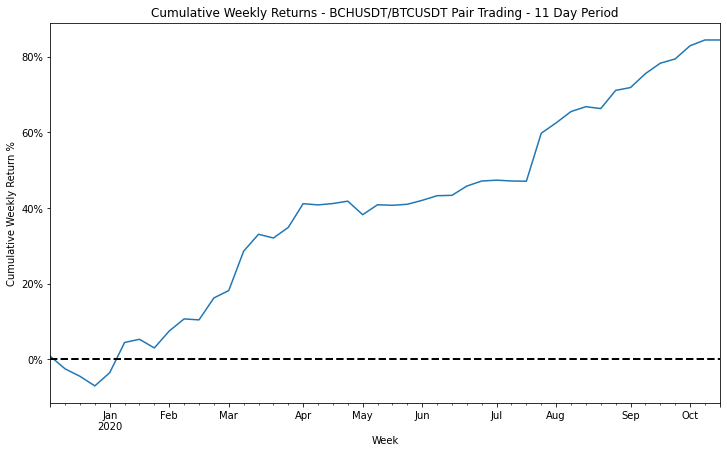

In [16]:
# cumulative weekly returns
ax = ((np.exp(results\
.groupby('Week')['returns']\
.sum().cumsum())-1)*100)\
.plot(figsize=(12,7),
     title='Cumulative Weekly Returns - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Cumulative Weekly Return %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.axhline(y=0 * 5, xmin=0, xmax=1, color='black', linestyle='--', lw=2)

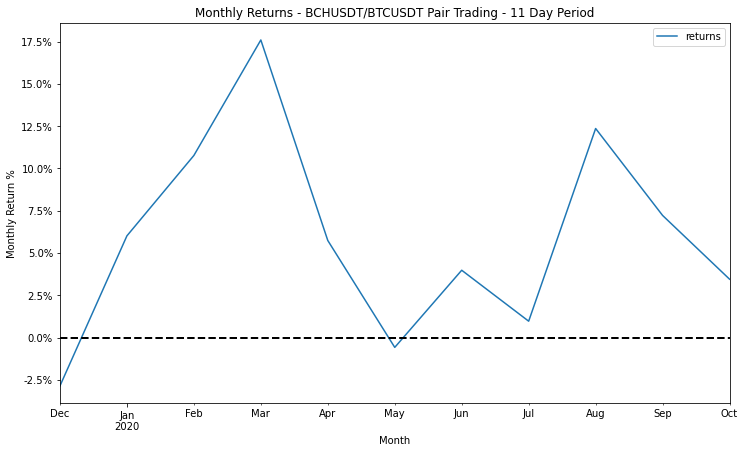

In [17]:
#monthly returns
ax = (results\
.groupby('Month')\
.agg({'returns': returns})*100)\
.plot(figsize=(12,7),
     title='Monthly Returns - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Monthly Return %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.axhline(y=0 * 5, xmin=0, xmax=1, color='black', linestyle='--', lw=2)

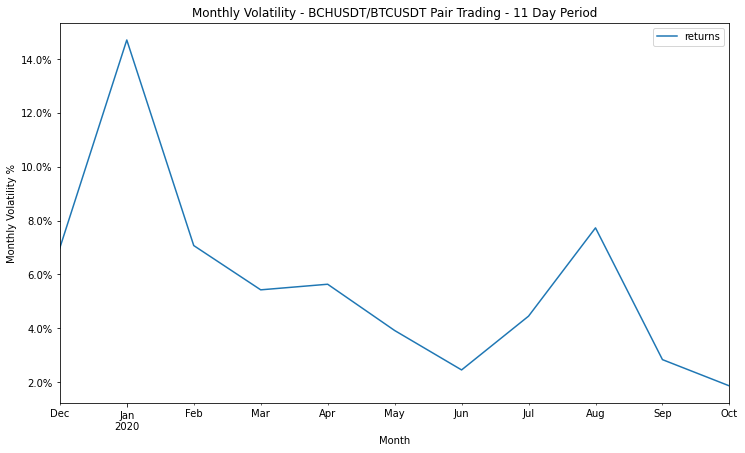

In [18]:
# monthly volatility
ax = (results\
.groupby('Month')\
.agg({'returns': volatility})*100)\
.plot(figsize=(12,7),
     title='Monthly Volatility - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Monthly Volatility %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

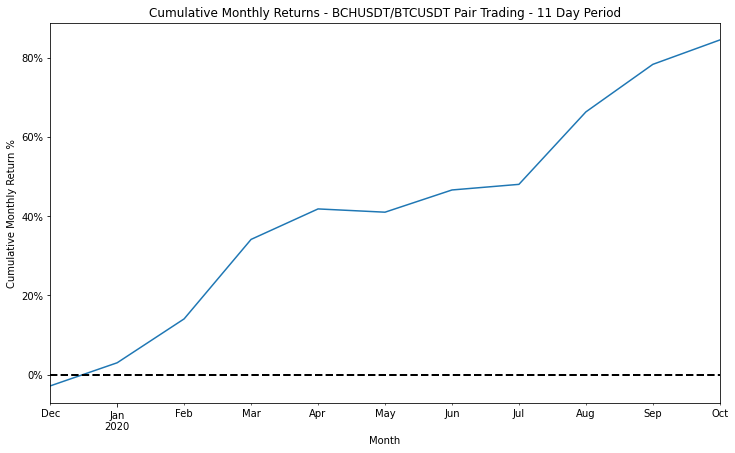

In [19]:
#cumulative monthly returns
ax = ((np.exp(results\
.groupby('Month')['returns']\
.sum().cumsum())-1)*100)\
.plot(figsize=(12,7),
     title='Cumulative Monthly Returns - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Cumulative Monthly Return %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.axhline(y=0 * 5, xmin=0, xmax=1, color='black', linestyle='--', lw=2)

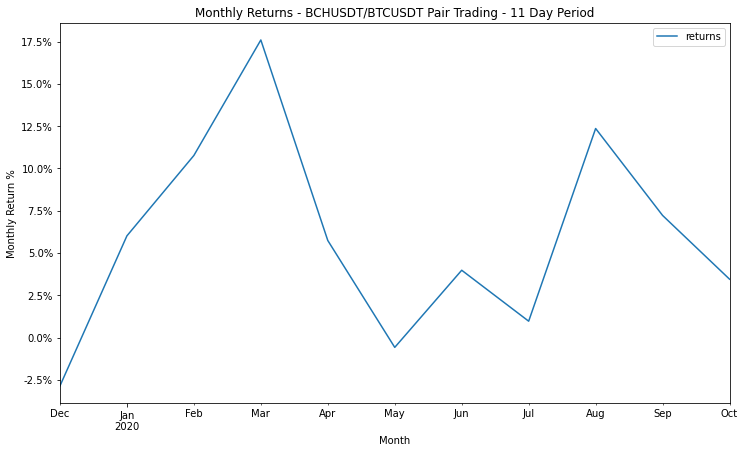

In [20]:
#monthly returns
ax = (results\
.groupby('Month')\
.agg({'returns': returns})*100)\
.plot(figsize=(12,7),
     title='Monthly Returns - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Monthly Return %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

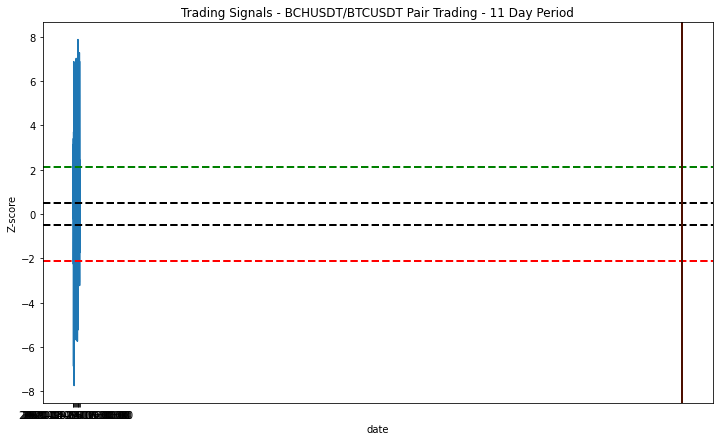

In [21]:
ax=results.zscore.plot(figsize=(12,7),title='Trading Signals - BCHUSDT/BTCUSDT Pair Trading - 11 Day Period',
     ylabel='Z-score')
results.index = pd.to_datetime(results.index)
ax.axhline(y=2.1, xmin=0, xmax=1, color='green', linestyle='--', lw=2)
ax.axhline(y=-2.1, xmin=0, xmax=1, color='red', linestyle='--', lw=2)
ax.axhline(y=0.5, xmin=0, xmax=1, color='black', linestyle='--', lw=2)
ax.axhline(y=-0.5, xmin=0, xmax=1, color='black', linestyle='--', lw=2)
for key, row in results.iterrows():
    if row.signal == 'Long':
        ax.axvline(pd.to_datetime(row.name), color='green', linestyle='--', lw=0.2)
    elif row.signal == 'Short':
        ax.axvline(pd.to_datetime(row.name), color='r', linestyle='--', lw=0.2)
    elif row.signal == 'Exit':
        ax.axvline(pd.to_datetime(row.name), color='black', linestyle='--', lw=0.2)